# Problem Statement 
Here the SalesPrice is the property sales price in Dollars which is the target variable.The problem Statement is to know which influences help in the price negotitations than the number of bedrooms or the white fence of the house. And to predit the final price of the house.


INTRODUCTION:

The idea of the dataset is to provide with the series of features which have as a target value the cost of the house.

## Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn import metrics 


%matplotlib inline 

In [2]:
prices=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv")
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Description 

In [3]:
prices.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


Here  the descrption gives the idea that the data is normalized or not so that the further actions can be taken to make it normalized if it's not.

##### Data Shape and Data Info 

In [4]:
prices.shape

(1460, 81)

In [5]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### PreProfiling 

Preprofiling helps to understand the data in a very precise way at one place itself.It helps to under go every details of the data including correlations,warnings,etc. 

In [6]:
!pip install pandas-profiling==1.4.1

In [7]:
import pandas_profiling
profile=pandas_profiling.ProfileReport(prices)
profile.to_file(outputfile="pre_profiling_main.html")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


Now we have a clearity of the data with the help of this 'HTML file'.

##### Data Treatment

In [8]:
prices.select_dtypes(include=['object']).head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
prices.select_dtypes(exclude=['object']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
prices_cat=prices.select_dtypes(include=['object']).copy()

In [11]:
prices_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
prices=prices.select_dtypes(exclude=['object']).copy()

In [13]:
prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [14]:
prices.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [15]:
prices_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

##### Solving the problems with NAN values

In [16]:
# Dropping not neccesssary feauters 
prices_cat= prices_cat.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

In [17]:
prices_cat['BsmtQual']= prices_cat['BsmtQual'].fillna(prices_cat['BsmtQual'].value_counts().index[0])

In [18]:
prices_cat['BsmtCond']=prices_cat['BsmtCond'].fillna(prices_cat['BsmtCond'].value_counts().index[0])

In [19]:
prices_cat['BsmtExposure']=prices_cat['BsmtExposure'].fillna(prices_cat['BsmtExposure'].value_counts().index[0])

In [20]:
prices_cat['BsmtFinType1']=prices_cat['BsmtFinType1'].fillna(prices_cat['BsmtFinType1'].value_counts().index[0])

In [21]:
prices_cat['BsmtFinType2']=prices_cat['BsmtFinType2'].fillna(prices_cat['BsmtFinType2'].value_counts().index[0])

In [22]:
prices_cat['Electrical']=prices_cat['Electrical'].fillna(prices_cat['Electrical'].value_counts().index[0])

In [23]:
prices_cat['FireplaceQu']=prices_cat['FireplaceQu'].fillna(prices_cat['FireplaceQu'].value_counts().index[0])

In [24]:
prices_cat['GarageType']=prices_cat['GarageType'].fillna(prices_cat['GarageType'].value_counts().index[0])

In [25]:
prices_cat['GarageFinish']=prices_cat['GarageFinish'].fillna(prices_cat['GarageFinish'].value_counts().index[0])

In [26]:
prices_cat['GarageQual']=prices_cat['GarageQual'].fillna(prices_cat['GarageQual'].value_counts().index[0])

In [27]:
prices_cat['GarageCond']=prices_cat['GarageCond'].fillna(prices_cat['GarageCond'].value_counts().index[0])

In [28]:
prices_cat.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [29]:
prices['LotFrontage']=prices['LotFrontage'].fillna(prices['LotFrontage'].mean())
prices['MasVnrArea']=prices['MasVnrArea'].fillna(prices['MasVnrArea'].mean())
prices['GarageYrBlt']=prices['GarageYrBlt'].fillna(prices['GarageYrBlt'].mean())

In [30]:
prices.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [31]:
sales_prices= pd.concat([prices,prices_cat], axis=1)

In [32]:
sales_prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [33]:
sales_prices= sales_prices.drop(['2ndFlrSF','3SsnPorch','BsmtFinType1','BsmtFinType2','BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces','GarageArea','GarageCars','HalfBath','LowQualFinSF','MasVnrArea','MiscVal','PoolArea','ScreenPorch','TotalBsmtSF','WoodDeckSF'],axis=1)

In [34]:
sales_prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [35]:
sales_prices.shape

(1460, 58)

In [36]:
profile=pandas_profiling.ProfileReport(sales_prices)
profile.to_file(outputfile="profiling after processing_main.html")

#### EDA

In [37]:
sales_prices.select_dtypes(include=['object']).head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [38]:
sales_prices.select_dtypes(exclude=['object']).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,1710,2,3,1,8,2003.0,61,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,1262,2,3,1,6,1976.0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,1786,2,3,1,6,2001.0,42,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,1717,1,3,1,7,1998.0,35,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,2198,2,4,1,9,2000.0,84,12,2008,250000


In [39]:
prices_cat=sales_prices.select_dtypes(include=['object']).copy()

In [40]:
prices_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [41]:
prices_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [42]:
prices_cat.shape

(1460, 37)

In [43]:
prices=sales_prices.select_dtypes(exclude=['object']).copy()

In [44]:
prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,...,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,706,0,...,1710,2,3,1,8,2003.0,61,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,978,0,...,1262,2,3,1,6,1976.0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,486,0,...,1786,2,3,1,6,2001.0,42,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,216,0,...,1717,1,3,1,7,1998.0,35,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,655,0,...,2198,2,4,1,9,2000.0,84,12,2008,250000


In [45]:
prices.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'GarageYrBlt', 'OpenPorchSF', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')

In [46]:
prices=prices.drop(['Id'], axis=1)
prices.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,1stFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,706,0,856,1710,2,3,1,8,2003.0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,978,0,1262,1262,2,3,1,6,1976.0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,486,0,920,1786,2,3,1,6,2001.0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,216,0,961,1717,1,3,1,7,1998.0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,655,0,1145,2198,2,4,1,9,2000.0,84,12,2008,250000


In [47]:
prices.shape

(1460, 20)

<function matplotlib.pyplot.show(*args, **kw)>

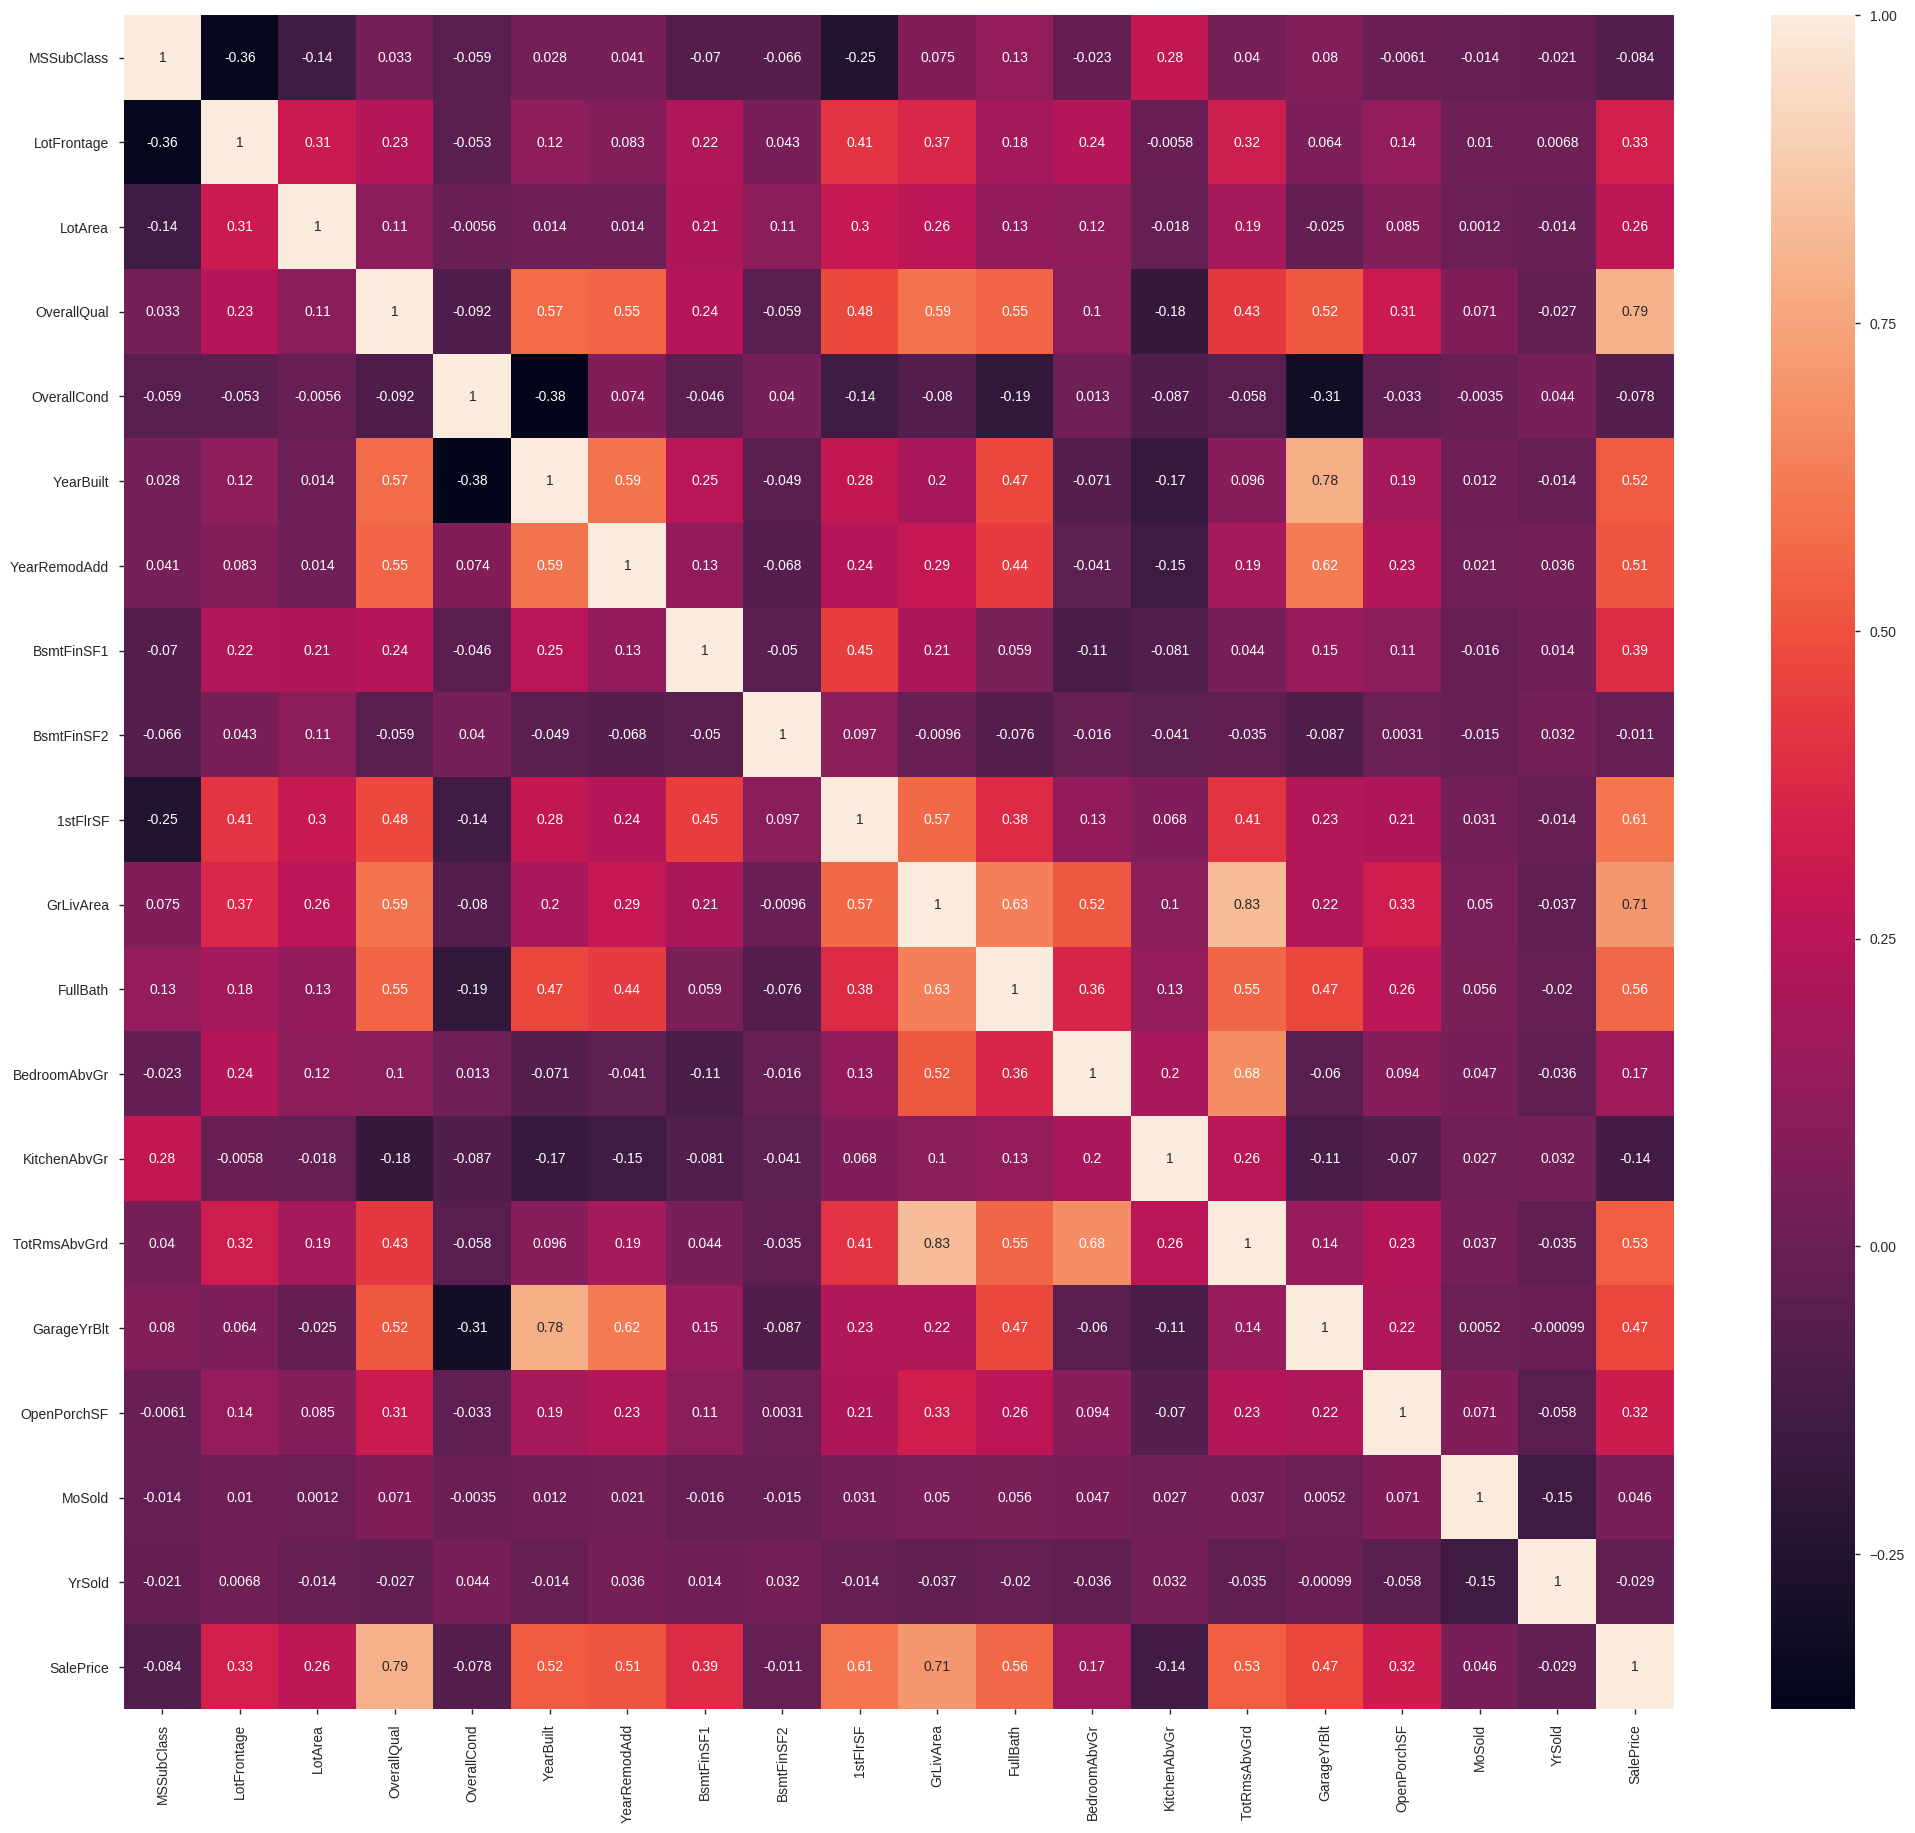

In [48]:
plt.figure(figsize=(25,22))
sns.heatmap(prices.corr(), annot= True)
plt.show

In [49]:
feature_cols = ['MSSubClass', 'LotFrontage', 'LotArea','OverallCond','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'OpenPorchSF','MoSold', 'YrSold']

X= prices[feature_cols]

In [50]:
feature_cols = ['MSSubClass', 'LotFrontage', 'LotArea','OverallCond','YearRemodAdd','BsmtFinSF1','BsmtFinSF2', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'OpenPorchSF','MoSold', 'YrSold']
X_fresh = X[feature_cols]

In [51]:
X_fresh.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,FullBath,BedroomAbvGr,KitchenAbvGr,OpenPorchSF,MoSold,YrSold
0,60,65.0,8450,5,2003,706,0,2,3,1,61,2,2008
1,20,80.0,9600,8,1976,978,0,2,3,1,0,5,2007
2,60,68.0,11250,5,2002,486,0,2,3,1,42,9,2008
3,70,60.0,9550,5,1970,216,0,1,3,1,35,2,2006
4,60,84.0,14260,5,2000,655,0,2,4,1,84,12,2008


In [52]:
X_fresh.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'OpenPorchSF', 'MoSold', 'YrSold'],
      dtype='object')

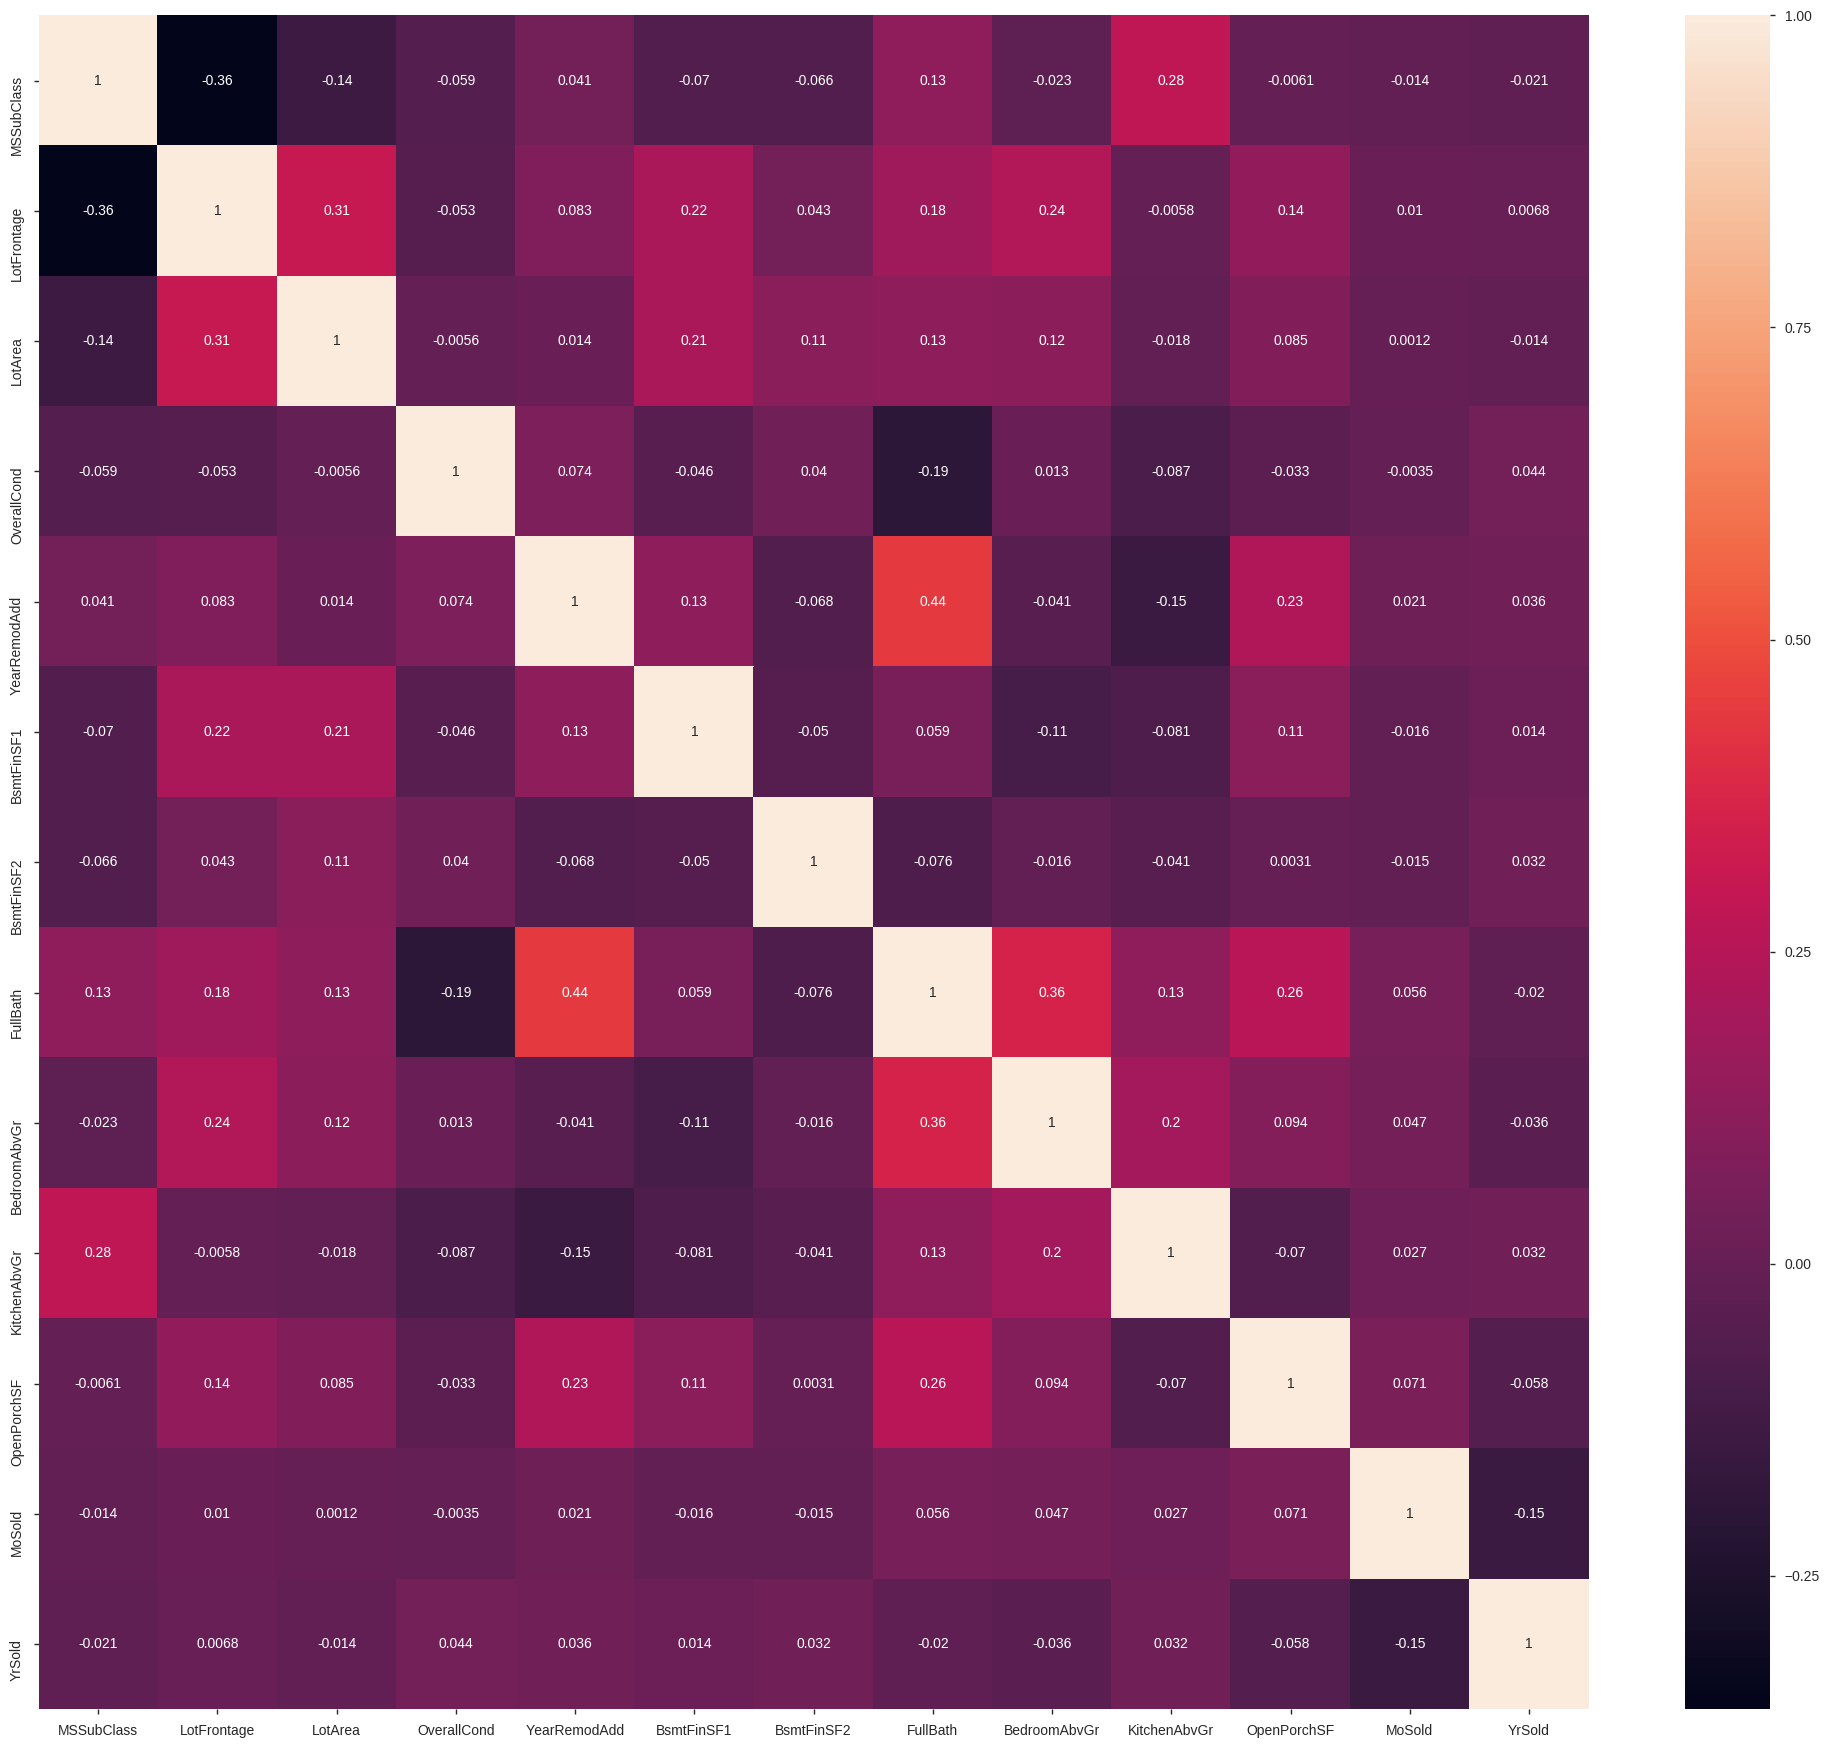

In [53]:
plt.figure(figsize=(25,22))
sns.heatmap(X_fresh.corr(), annot=True)

## Q- When was the property sold in which year and month ?

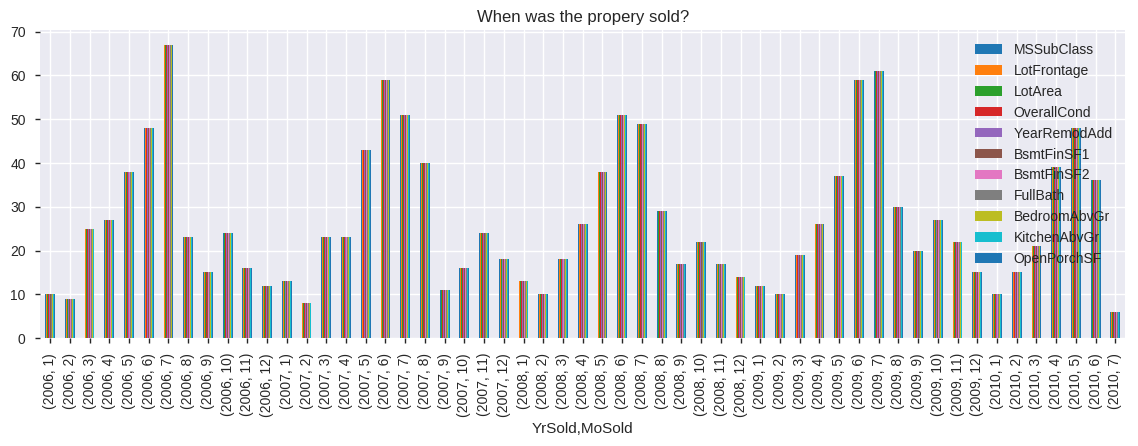

In [54]:
X_fresh.groupby(['YrSold','MoSold']).count().plot(kind='bar',figsize=(14,4))
plt.title("When was the propery sold?")
plt.show()

## Q- Where are the Property Location ?

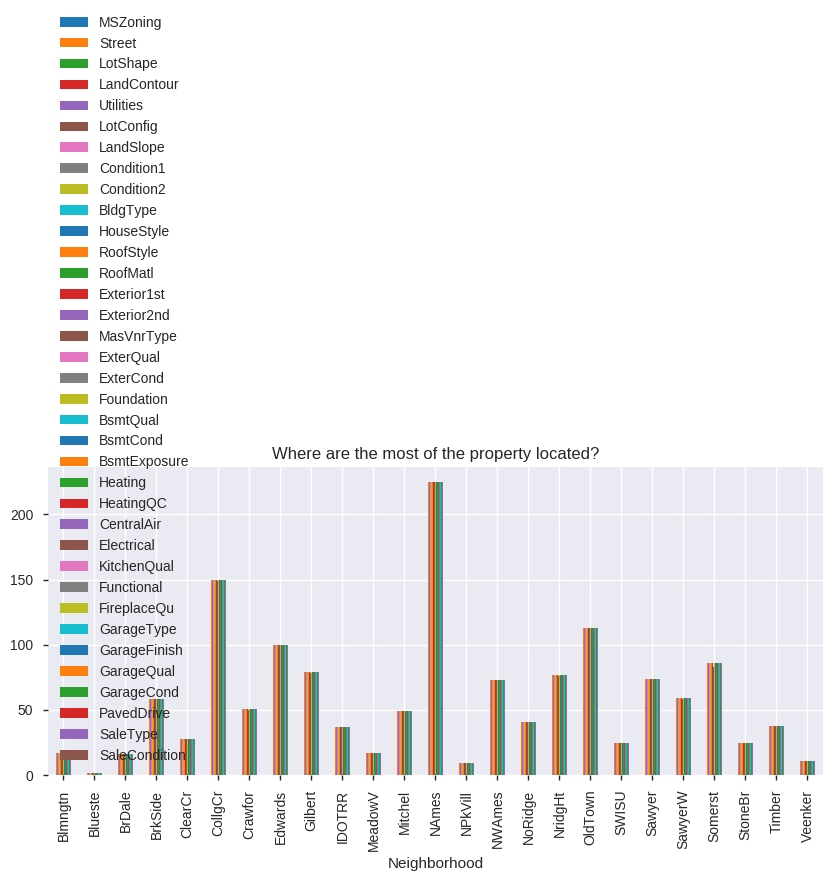

In [55]:
prices_cat.groupby('Neighborhood').count().plot(kind='bar',figsize=(10,4))
plt.title("Where are the most of the property located?")
plt.show()

## Q- Did the SalesPrice Vary ?

Text(0.5, 1.0, 'Histogram showing the distribution of SalesPrice')

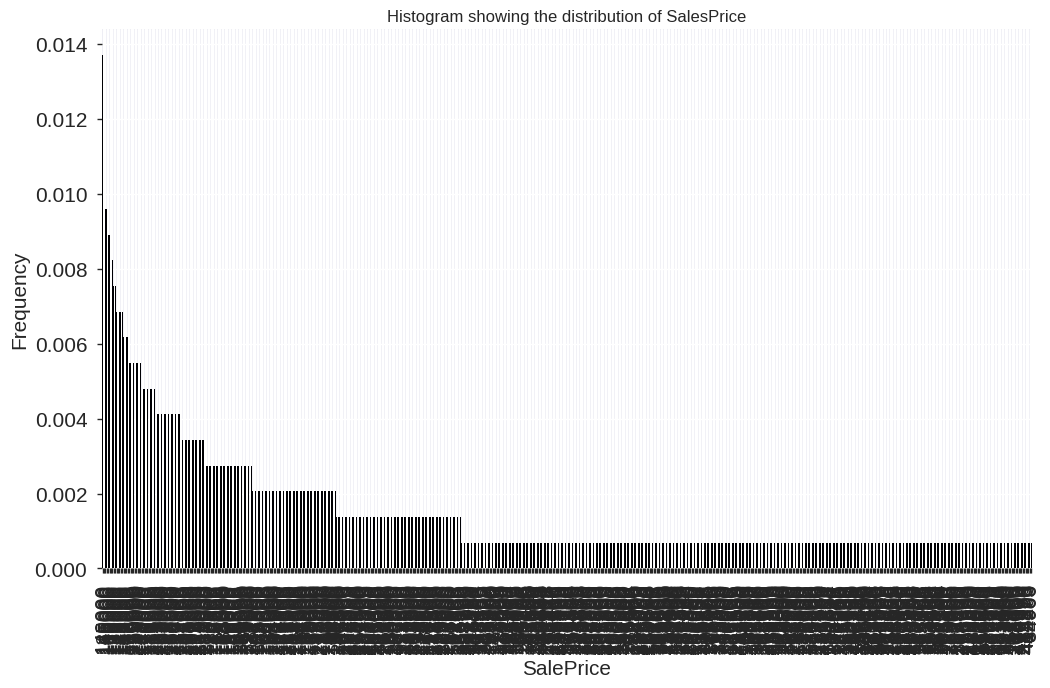

In [56]:
(prices['SalePrice'].value_counts() / len(prices)).plot(kind='bar', figsize=(12,7),colormap='magma',fontsize=15)
plt.xlabel('SalePrice',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Histogram showing the distribution of SalesPrice')


## Q- Which year had lots of houses sold and at what price? 

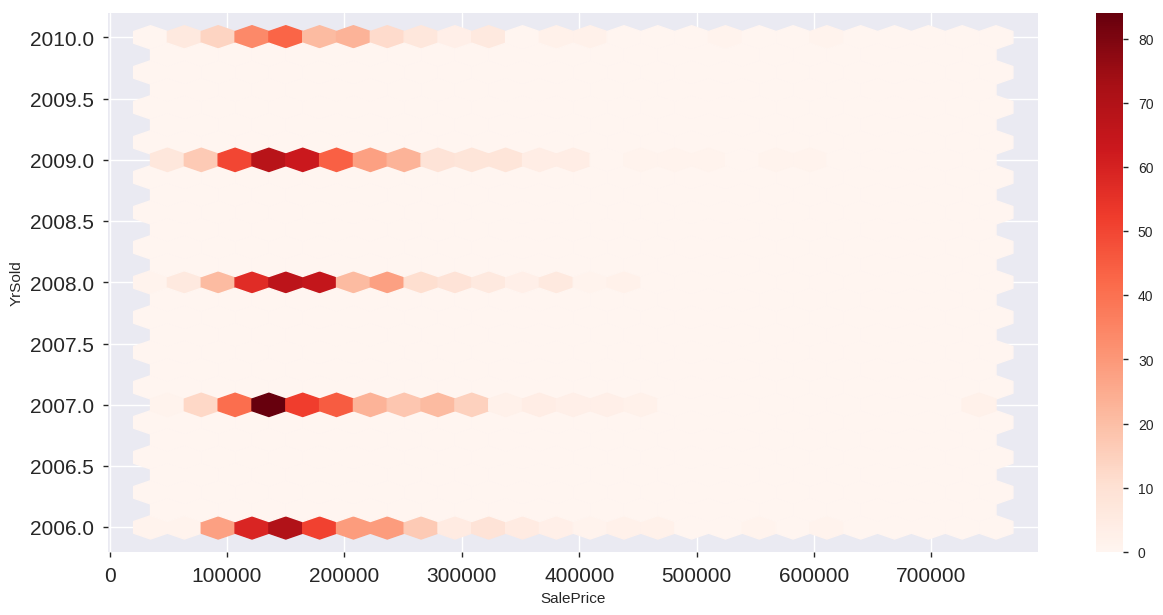

In [57]:
prices.plot(kind='hexbin',x='SalePrice',y='YrSold',figsize=(15,7),gridsize=25,fontsize=15,colormap='Reds')
plt.show()

## Q- Does the Overall condition  influence the SalePrice ?

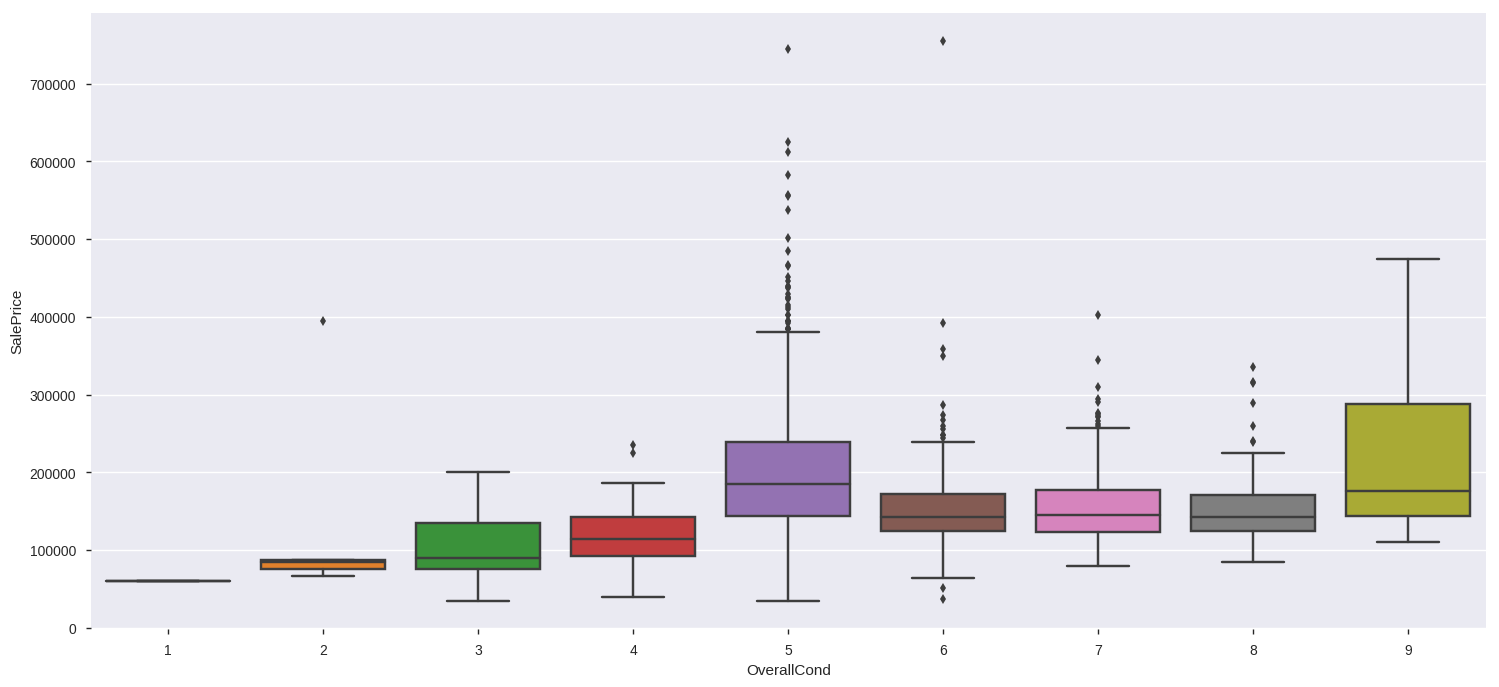

In [58]:
plt.figure(figsize=(18,8))
sns.boxplot(x=X_fresh.OverallCond,y=prices.SalePrice)

## Q- What are the features which are correlated to  the SalesPrice?

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


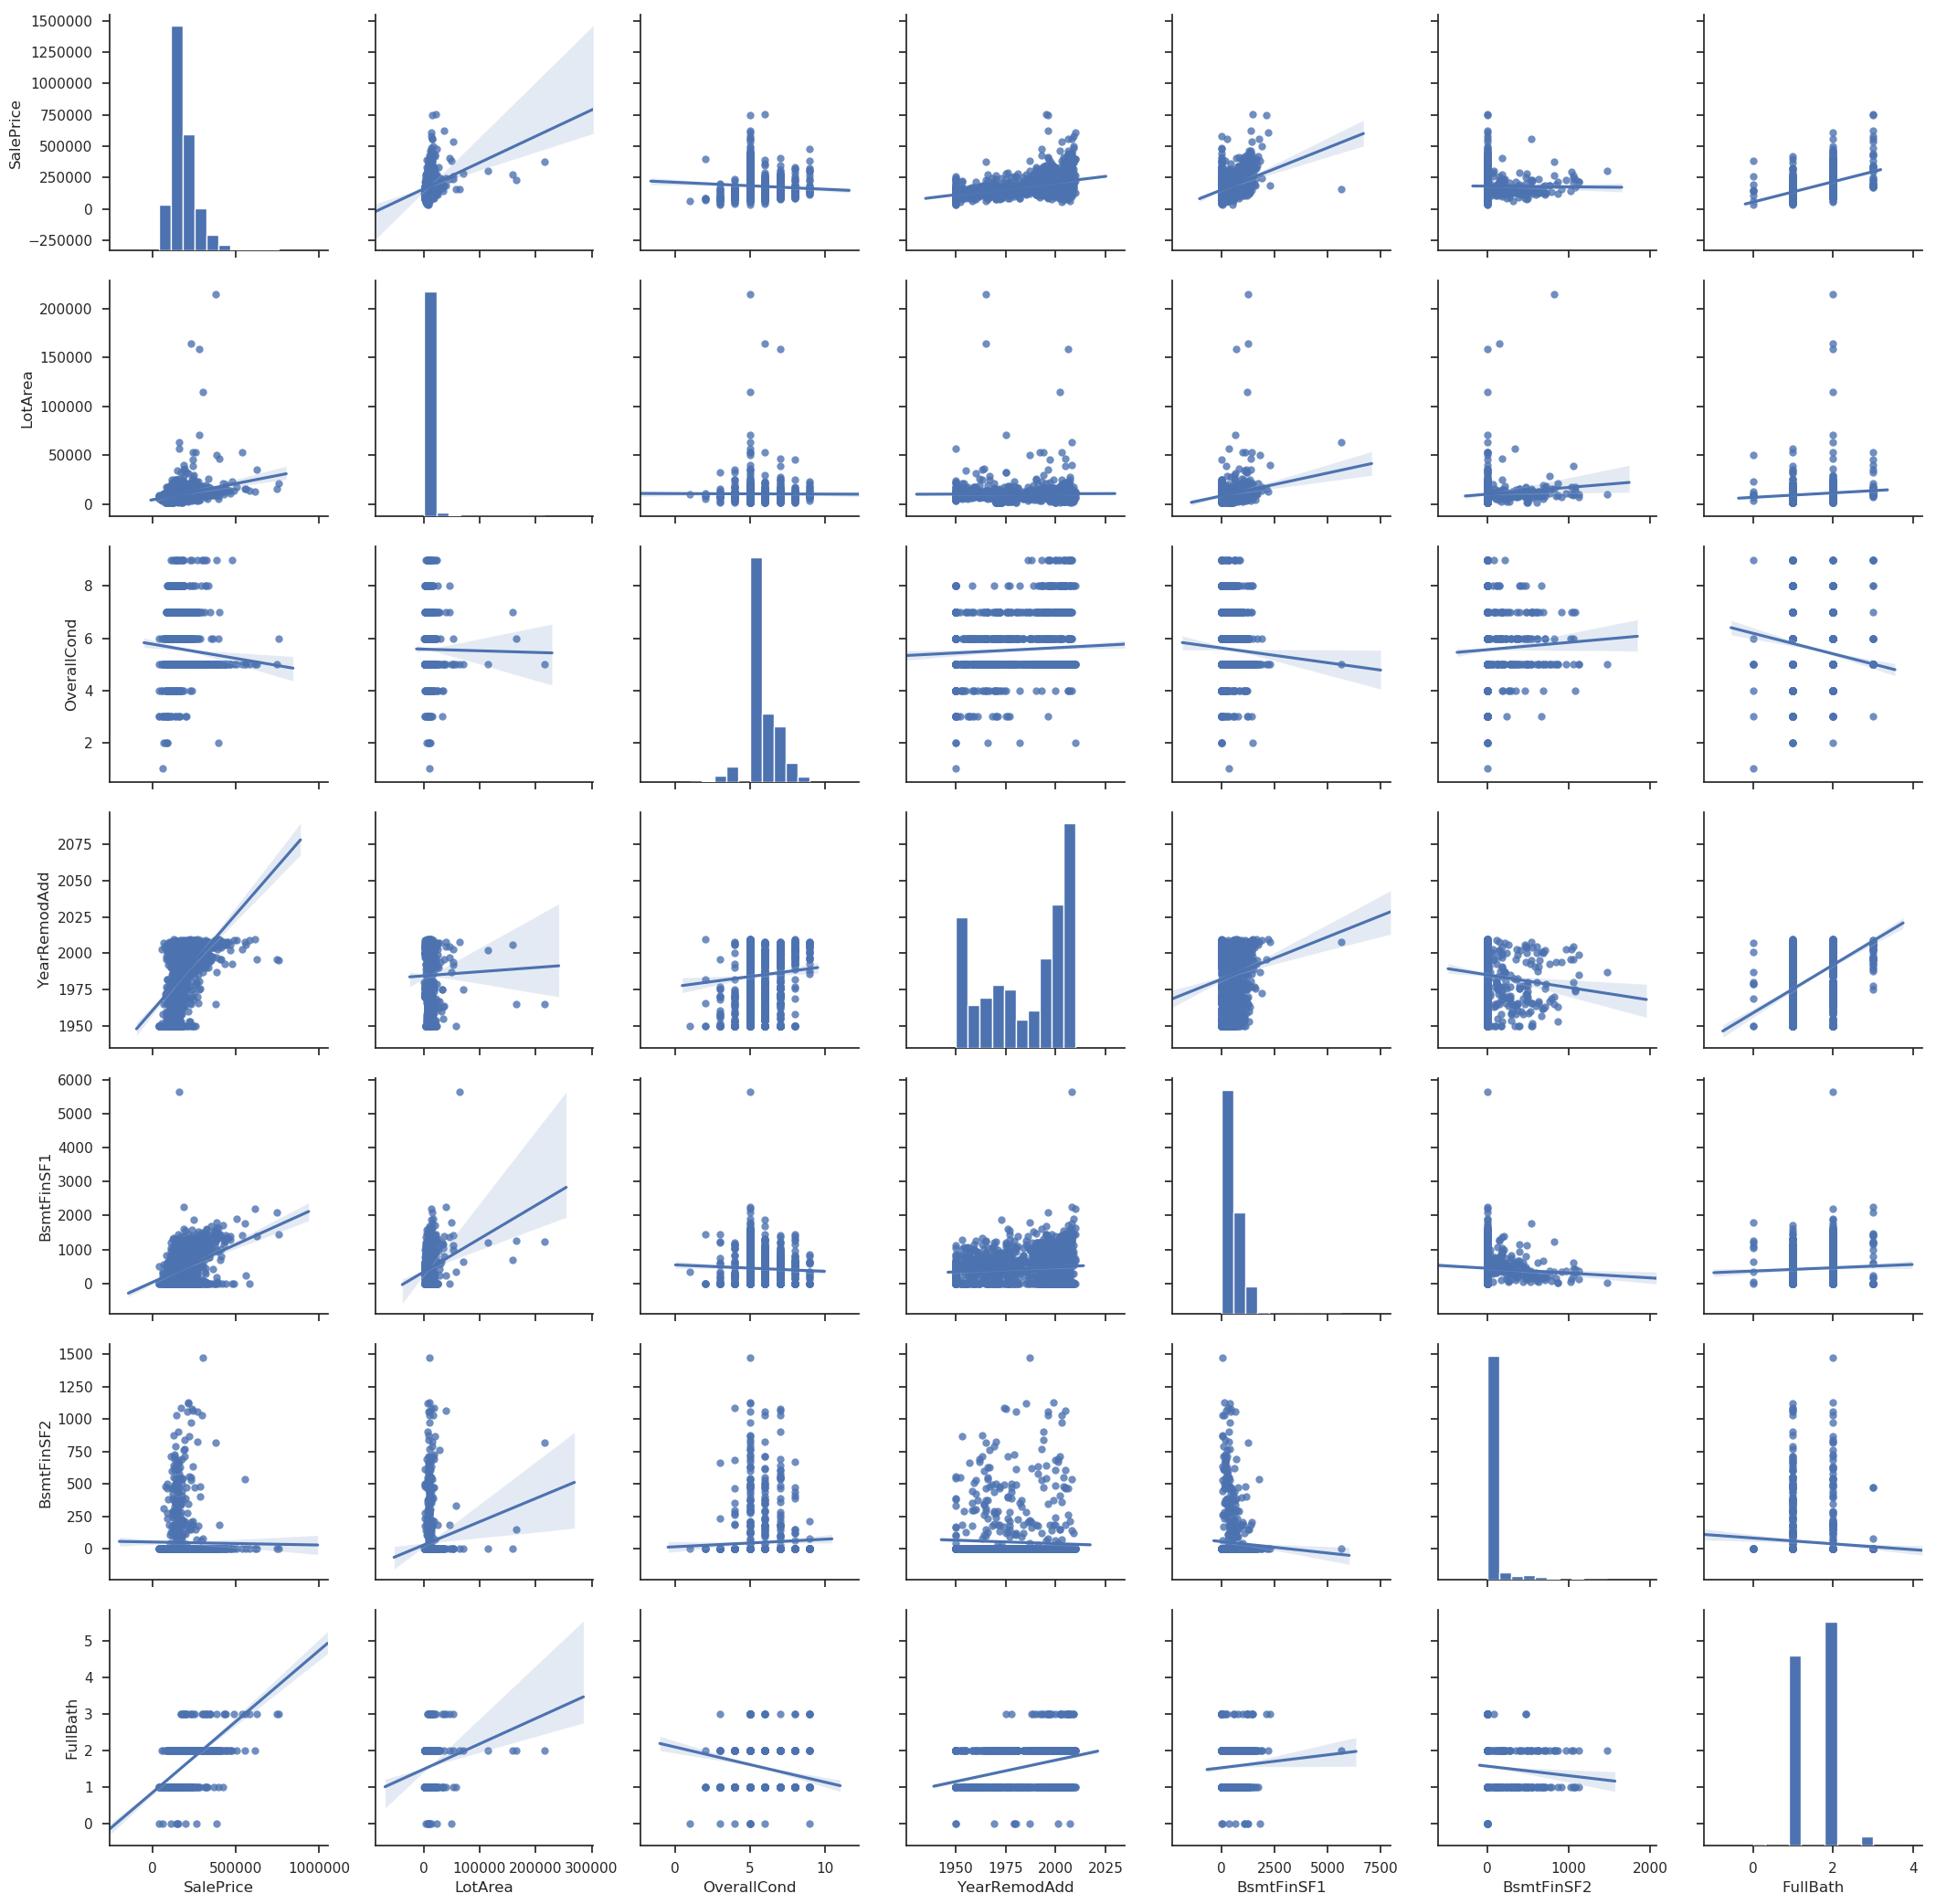

In [59]:
col=['SalePrice','LotArea','OverallCond','YearRemodAdd','BsmtFinSF1','BsmtFinSF2','FullBath']
sns.set(style='ticks')
sns.pairplot(prices[col],size=3,kind='reg')

## Standardlization

Need to bring the data in Normal Distribution.

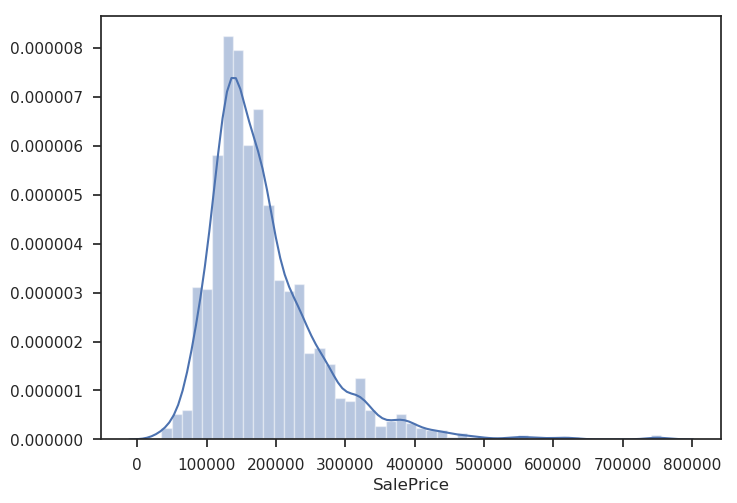

In [60]:
sns.distplot(prices.SalePrice, color="b")

In [61]:
y=prices.SalePrice 
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [62]:
y_logScale= np.log(y)
y_logScale.head()
y=y_logScale

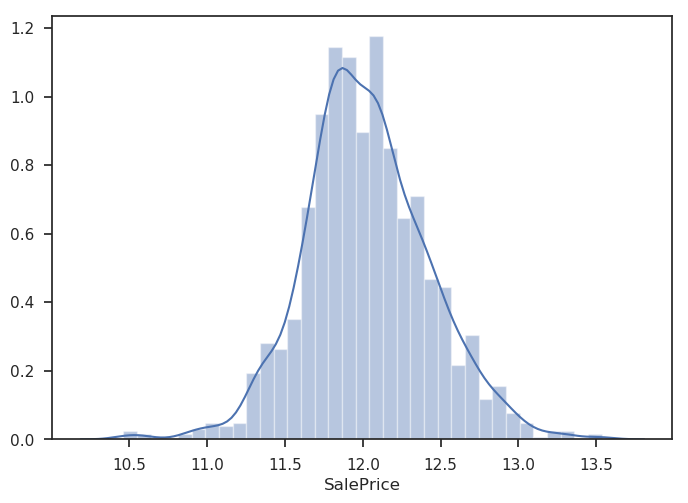

In [63]:
sns.distplot(y,color="b")

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_fresh)
X_fresh1 = scaler.transform(X_fresh)

X_fresh = pd.DataFrame(X_fresh1)
X_fresh.head()


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.073375,-0.229372,-0.207142,-0.517200,0.878668,0.575425,-0.288653,0.789741,0.163779,-0.211454,0.216503,-1.599111,0.138777
1,-0.872563,0.451936,-0.091886,2.179628,-0.429577,1.171992,-0.288653,0.789741,0.163779,-0.211454,-0.704483,-0.489110,-0.614439
2,0.073375,-0.093110,0.073480,-0.517200,0.830215,0.092907,-0.288653,0.789741,0.163779,-0.211454,-0.070361,0.990891,0.138777
3,0.309859,-0.456474,-0.096897,-0.517200,-0.720298,-0.499274,-0.288653,-1.026041,0.163779,-0.211454,-0.176048,-1.599111,-1.367655
4,0.073375,0.633618,0.375148,-0.517200,0.733308,0.463568,-0.288653,0.789741,1.390023,-0.211454,0.563760,2.100892,0.138777


## Splitting X and Y into Training and Test Datasets

In [65]:
from sklearn.model_selection import train_test_split

def split(X_fresh,y):
    return train_test_split(X_fresh,y,test_size=0.20,random_state=1)

In [66]:
X_fresh_train,X_fresh_test,y_train,y_test=split(X_fresh,y)
print('Train cases as below')
print('X_fresh_train shape: ',X_fresh_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_fresh_test shape: ',X_fresh_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_fresh_train shape:  (1168, 13)
y_train shape:  (1168,)

Test cases as below
X_fresh_test shape:  (292, 13)
y_test shape:  (292,)


In [67]:

def linear_reg(X_fresh,y, gridsearch =False):
    X_fresh_train,X_fresh_test,y_train,y_test=split(X_fresh,y)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_fresh_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Interpreting Model Coefficients

In [68]:
print('Intercept: ', linreg.intercept_)
print('Coefficients: ', linreg.coef_)

Intercept:  12.026574583137027
Coefficients:  [-0.01238161  0.03622419  0.03413493  0.00459679  0.13092625  0.09465122
  0.02301705  0.15546693  0.04152342 -0.05389256  0.02338912  0.01204861
 -0.01006379]


In [69]:
feature_cols.insert(0,'Intercept')
coef=linreg.coef_.tolist()
coef.insert(0,linreg.intercept_)

In [70]:
eq1 = zip(feature_cols,coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 12.026574583137027
MSSubClass -0.012381608711928574
LotFrontage 0.036224188772900755
LotArea 0.03413492865935211
OverallCond 0.004596787465319559
YearRemodAdd 0.13092624914724776
BsmtFinSF1 0.09465122021284264
BsmtFinSF2 0.02301705415322368
FullBath 0.1554669334320326
BedroomAbvGr 0.04152342350813098
KitchenAbvGr -0.05389255617513319
OpenPorchSF 0.023389116017372636
MoSold 0.012048614037427671
YrSold -0.010063791939199592


## Using the Model for Prediction 

In [71]:
y_pred_train = linreg.predict(X_fresh_train)

In [72]:
y_pred_test = linreg.predict(X_fresh_test)

In [73]:
y_pred_test

array([12.27588406, 12.24974033, 11.72033218, 11.55945962, 11.80514139,
       12.27036122, 12.29978197, 12.07652879, 12.22896629, 12.33994215,
       12.17684687, 11.20086661, 12.06619739, 11.92537521, 12.40848285,
       11.5228286 , 11.78574267, 11.74921205, 11.58346827, 12.01539217,
       12.11990999, 11.55954633, 12.24983487, 12.50480123, 11.47647362,
       12.2788342 , 12.11388985, 12.19864946, 12.62307692, 11.61756768,
       11.4698848 , 11.63674838, 11.75083094, 11.50031689, 12.07410794,
       12.58222599, 11.92507037, 11.53655682, 12.42397968, 11.83599542,
       11.92673941, 11.67857168, 11.50689027, 11.86982   , 12.18064832,
       12.21196061, 11.49544868, 12.07010108, 12.28657047, 12.39529056,
       11.59162644, 12.49969236, 11.61814239, 12.29290854, 12.17683442,
       11.49188516, 11.80871396, 12.15472324, 11.71558918, 12.05509925,
       11.75943587, 12.27877754, 11.48141537, 11.9257528 , 11.99100603,
       12.03969649, 11.82219317, 12.30306059, 12.26743505, 12.01

We need to evaluate the metrics in order to compare our predictions with the actual values.

## Model Evaluation Using Metrics

In [74]:
MAE_train = metrics.mean_absolute_error(y_train,y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test,y_pred_test)

In [75]:
print('MAE for training set is ',format(MAE_train))
print('MAE for test set is ',format(MAE_test))

MAE for training set is  0.17486070553626945
MAE for test set is  0.182726331394749


In [76]:
MSE_train = metrics.mean_squared_error(y_train,y_pred_train)
MSE_test = metrics.mean_squared_error(y_test,y_pred_test)

In [77]:
print('MSE for training set is ',format(MSE_train))
print('MSE for test set is ',format(MSE_test))

MSE for training set is  0.057331441430933355
MSE for test set is  0.06525739401562182


In [78]:
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,y_pred_test))

In [79]:
print('RMSE for training set  is ',format(RMSE_train))
print('RMSE for test is ',format(RMSE_test))

RMSE for training set  is  0.23943984929608805
RMSE for test is  0.2554552681304925


In [80]:
yhat = linreg.predict(X_fresh_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1- (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 -(1-r_squared)*(len(y_train)-1)/len(y_train)-(X_fresh_train.shape[1]-1)
print('R_squared value is ',format(r_squared),'Adjusted R_squared value is ',format(adjusted_r_squared)) 

R_squared value is  0.6312275593364276 Adjusted R_squared value is  -11.368456710834238
